<a href="https://colab.research.google.com/github/wirawansp/Deteksi-/blob/master/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128 #jumlah training 
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data() #ini ngeload data..

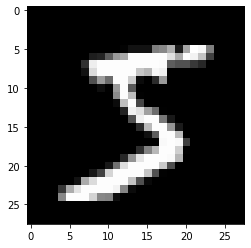

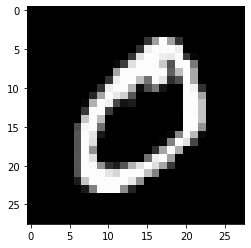

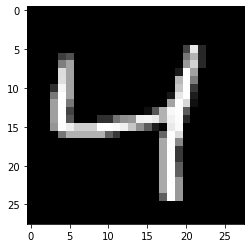

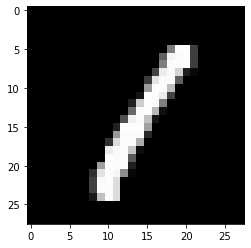

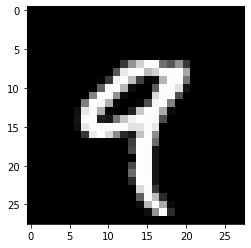

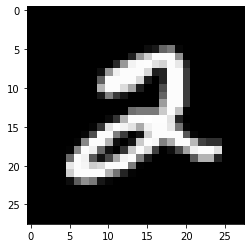

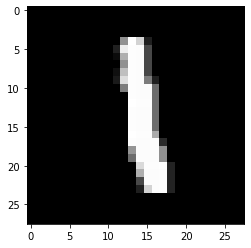

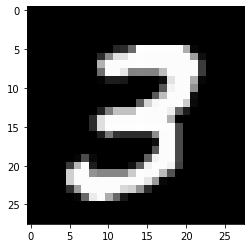

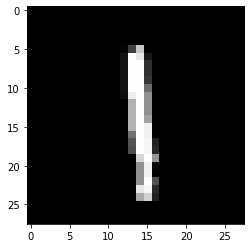

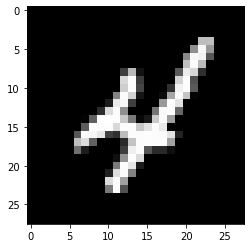

In [3]:
#ini visualisasi data gambar
for i in range (0, 10):
  plt.imshow(x_train[i],'gray')
  plt.show()

In [4]:
#preprocessing data sebelum masuk model
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(np.shape(x_train))

(60000, 28, 28, 1)


In [5]:
#normalisasi
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#standarisasi label (y)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   


In [8]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0242 - acc: 0.9927 - val_loss: 0.0295 - val_acc: 0.9912
Epoch 2/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0246 - acc: 0.9923 - val_loss: 0.0259 - val_acc: 0.9921
Epoch 3/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0244 - acc: 0.9926 - val_loss: 0.0289 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0291 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0295 - val_acc: 0.9919
Epoch 6/12
59776/60000 [============================>.] - ETA: 0s - loss: 0.0207 - acc: 0.9932

In [0]:
data_ke = 0

image_test = x_test[data_ke]
image_test = image_test.reshape(28,28)
plt.imshow(image_test,'gray')
plt.show()

image_test = image_test.reshape(1,28,28,1)
prediksi = model.predict(image_test)
print('prediksi: ' + str(np.argmax(prediksi)))
print(prediksi) #Probabilitas kelas